In [1]:
import commons


# this is a list of features which are used in the LGTM score
features = [
    'If a project uses LGTM',
    'The worse LGTM grade of a project'
]

class TestVector(commons.BaseTestVector):
        
    def __init__(self, alias = ''):
        super().__init__(features, alias)
            
    def use_lgtm(self, value):
        return self.set('If a project uses LGTM', value)
    
    def worse_lgtm_grade(self, grade):
        return self.set('The worse LGTM grade of a project', grade)


test_vector_list = commons.TestVectorList(features)

In [2]:
all_unknown_values = TestVector().score_from(0.0).score_to(1.0)
test_vector_list.register(all_unknown_values)

# the project doesn't use LGTM
test_vector_list.register(
    TestVector()
        .use_lgtm(False)
        .score_from(0.0)
        .score_to(1.0)
)

test_vector_list.register(
    TestVector()
        .use_lgtm(True)
        .worse_lgtm_grade('E')
        .score_from(1.0)
        .score_to(3.0)
)

test_vector_list.register(
    TestVector()
        .use_lgtm(True)
        .worse_lgtm_grade('D')
        .score_from(3.0)
        .score_to(5.0)
)

test_vector_list.register(
    TestVector()
        .use_lgtm(True)
        .worse_lgtm_grade('C')
        .score_from(5.0)
        .score_to(7.0)
)

test_vector_list.register(
    TestVector()
        .use_lgtm(True)
        .worse_lgtm_grade('B')
        .score_from(7.0)
        .score_to(9.0)
)

test_vector_list.register(
    TestVector()
        .use_lgtm(True)
        .worse_lgtm_grade('A')
        .score_from(9.0)
        .score_to(10.0)
)

test_vector_list.register(
    TestVector()
        .use_lgtm(True)
        .worse_lgtm_grade('A+')
        .score_from(9.0)
        .score_to(10.0)
)

registered: test_vector_0
registered: test_vector_1
registered: test_vector_2
registered: test_vector_3
registered: test_vector_4
registered: test_vector_5
registered: test_vector_6
registered: test_vector_7


In [3]:
test_vector_list.check()

In [4]:
# define test vectors
test_vectors = test_vector_list.make_data_frame()

# store the test vectors to a CSV file
filename = '../../../resources/com/sap/sgs/phosphor/fosstars/model/score/oss/LgtmScoreTestVectors.csv'
test_vectors.to_csv(filename)

# print out the test vectors
test_vectors

,alias,score_from,score_to,label,If a project uses LGTM,The worse LGTM grade of a project
0,test_vector_0,0.0,1.0,None,unknown,unknown
1,test_vector_1,0.0,1.0,None,False,unknown
2,test_vector_2,1.0,3.0,None,True,E
3,test_vector_3,3.0,5.0,None,True,D
4,test_vector_4,5.0,7.0,None,True,C
5,test_vector_5,7.0,9.0,None,True,B
6,test_vector_6,9.0,10.0,None,True,A
7,test_vector_7,9.0,10.0,None,True,A+


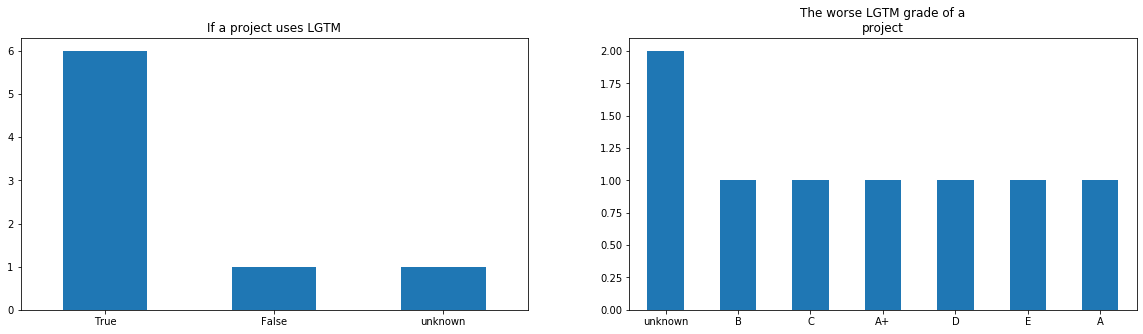

In [5]:
commons.draw_hists(features, test_vectors)